In [28]:
import json
import networkx as nx
import community

# Load JSON data into a Python dictionary
with open('preprocessed.json', 'r') as f:
    data = json.load(f)

# Convert the combined data to a list of edges
edges = []
for key, value in data.items():
    nodes = key.split('-')
    edge = (nodes[0], nodes[1], value)
    edges.append(edge)
    
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [29]:
def girvan_newman_algorithm(G):
    # calculate initial betweenness centrality of all edges
    betweenness = nx.edge_betweenness_centrality(G)
    
    while len(G.edges()) > 0:
        # remove edge with highest betweenness centrality
        max_edge = max(betweenness, key=betweenness.get)
        G.remove_edge(*max_edge)
        
        # recalculate betweenness centrality of remaining edges
        betweenness = nx.edge_betweenness_centrality(G)
        
        # check if the graph has been split into disconnected components
        if nx.number_connected_components(G) > 1:
            # if so, return the list of communities
            communities = list(nx.connected_components(G))
            return communities
    
    # if no disconnected components are found, return the original graph as a single community
    return [set(G.nodes())]

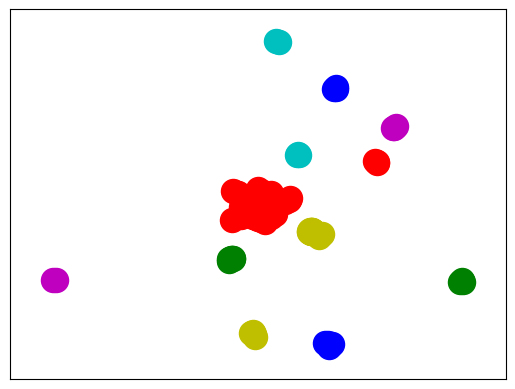

In [30]:
import matplotlib.pyplot as plt

# run the Girvan-Newman algorithm on a test graph
communities = girvan_newman_algorithm(G)

# plot the graph with nodes colored by their community membership
pos = nx.spring_layout(G)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)])
nx.draw_networkx_edges(G, pos)
plt.show()